In [1]:
cd ../ms_lesion_seg/

/home/sam/projects/ms_lesion_seg/ms_lesion_seg


In [2]:
%load_ext autoreload
%autoreload 2

In [11]:
from pathlib import Path
import numpy as np
import nibabel as nib
import os
import sys
from utils.plot import *
from train import DiceLoss
import torch

In [4]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['font.size'] = 22
plt.rcParams['image.cmap'] = 'Greys_r'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['image.interpolation'] = 'nearest'

In [5]:
def dice(a, b):
    return 1 - DiceLoss()(a, b)

In [6]:
patient_ids = [f'{i:03d}' for i in [1, 2, 3, 7, 8, 9, 10, 11, 12]]

In [7]:
truth_folder = Path("/iacl/pg20/sam/data/ms_lesions_2021/validation/")

In [8]:
fpaths = sorted([x for x in Path("/iacl/pg20/sam/data/ms_lesions_2021/preds/").iterdir() if ".nii.gz" in x.name])

==================== /iacl/pg20/sam/data/ms_lesions_2021/validation/001_mask.nii ====================


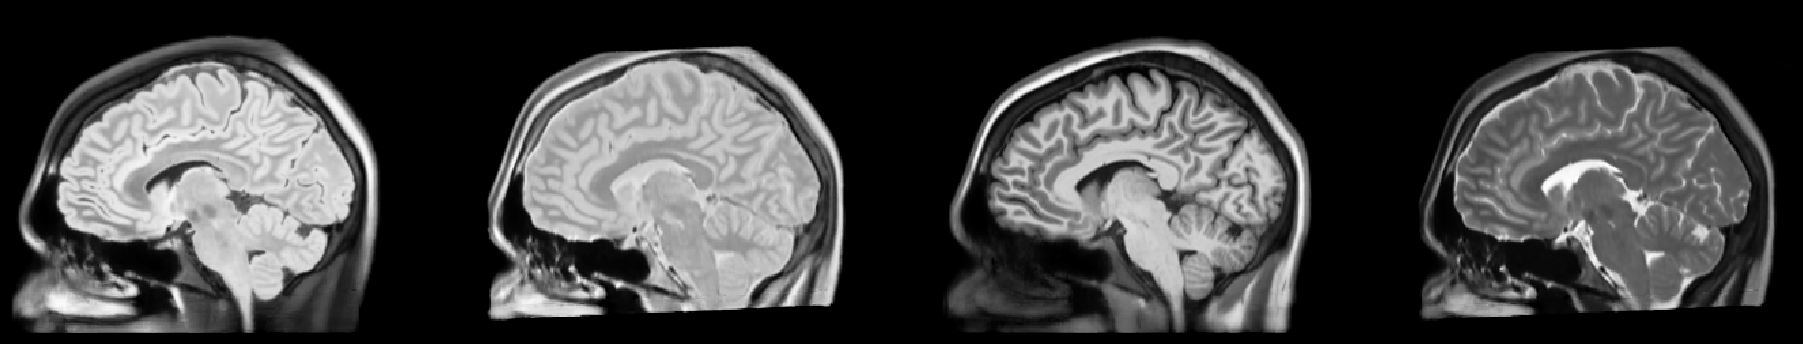

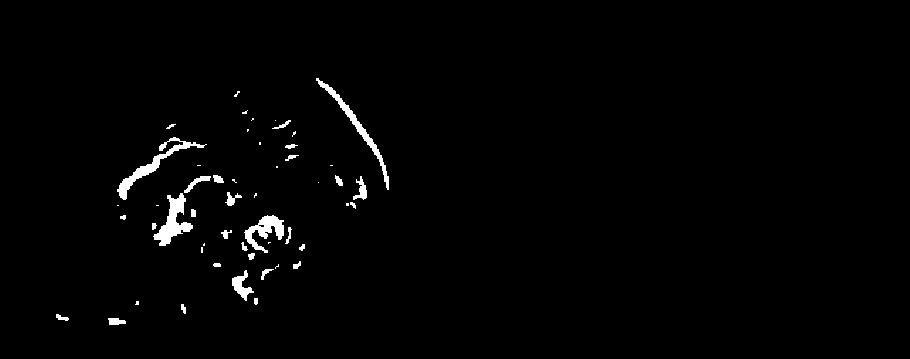

/iacl/pg20/sam/data/ms_lesions_2021/preds/001_MEMPRAGEPre_seg0.nii.gz: 0.4208589196205139


/iacl/pg20/sam/data/ms_lesions_2021/preds/001_MEMPRAGEPre_seg1.nii.gz: 0.4063352346420288


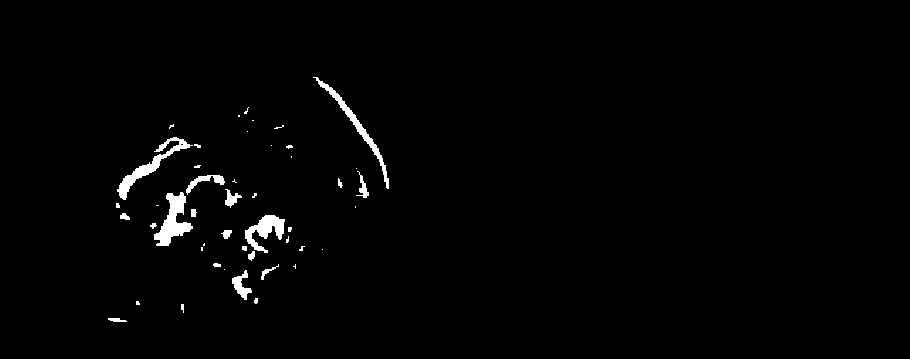

/iacl/pg20/sam/data/ms_lesions_2021/preds/001_MEMPRAGEPre_seg2.nii.gz: 0.402015745639801


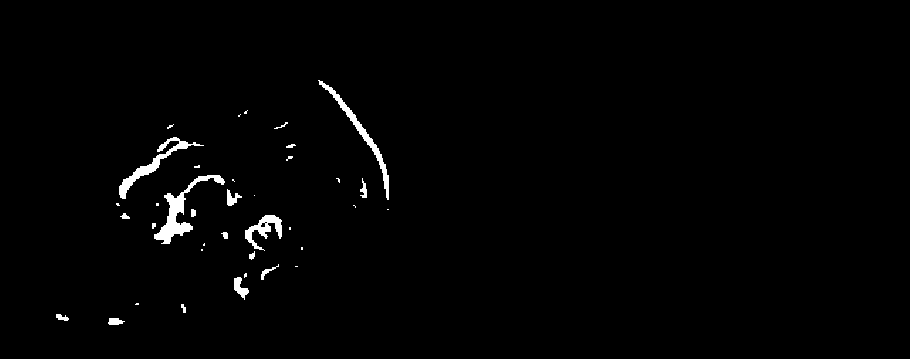

/iacl/pg20/sam/data/ms_lesions_2021/preds/001_MEMPRAGEPre_seg3.nii.gz: 0.38852572441101074


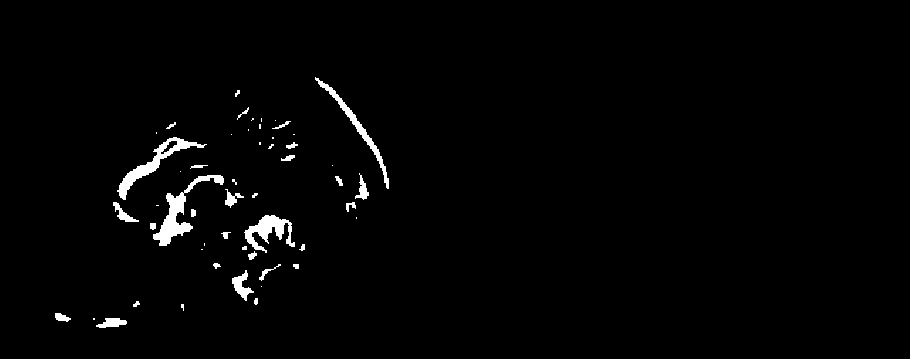

/iacl/pg20/sam/data/ms_lesions_2021/preds/001_MEMPRAGEPre_seg4.nii.gz: 0.3903147578239441


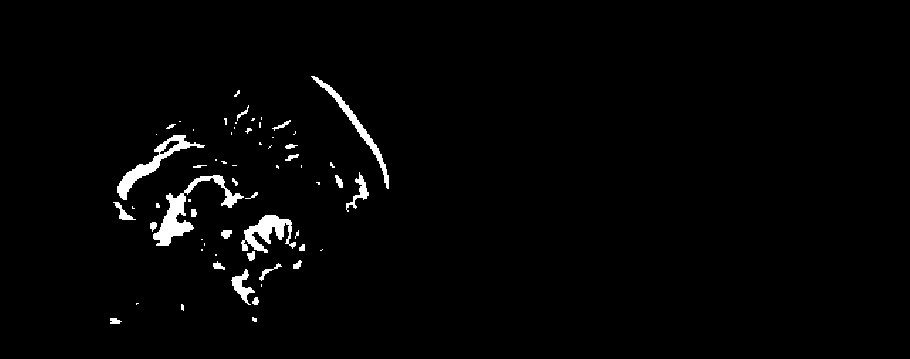

/iacl/pg20/sam/data/ms_lesions_2021/preds/001_MEMPRAGEPre_seg5.nii.gz: 0.36468398571014404


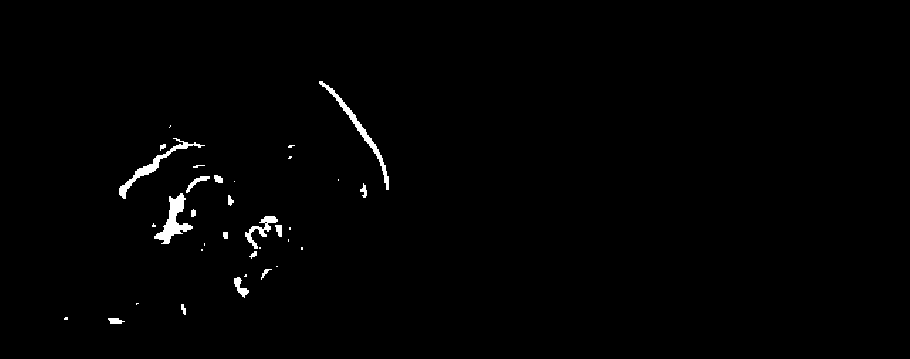

/iacl/pg20/sam/data/ms_lesions_2021/preds/001_MEMPRAGEPre_seg6.nii.gz: 0.44324761629104614


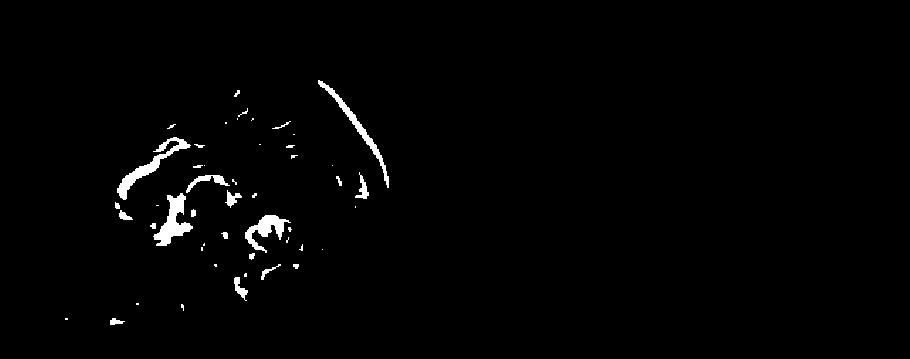

/iacl/pg20/sam/data/ms_lesions_2021/preds/001_MEMPRAGEPre_seg7.nii.gz: 0.37684768438339233


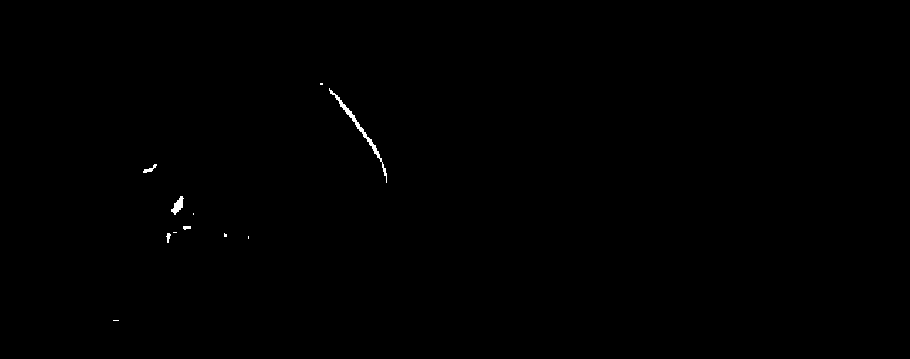

/iacl/pg20/sam/data/ms_lesions_2021/preds/001_MEMPRAGEPre_seg8.nii.gz: 0.5958338975906372


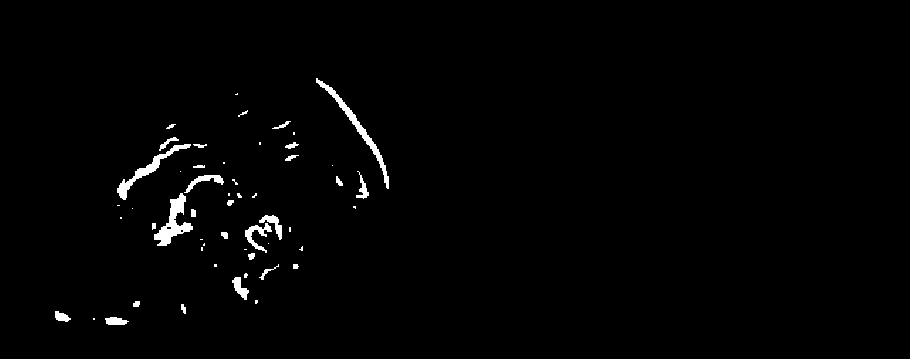

/iacl/pg20/sam/data/ms_lesions_2021/preds/001_MEMPRAGEPre_seg9.nii.gz: 0.4122309684753418


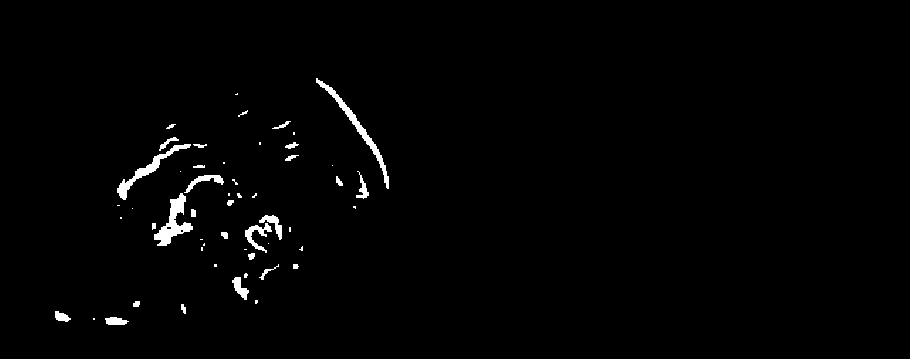

/iacl/pg20/sam/data/ms_lesions_2021/preds/001_MEMPRAGEPre_seg_final.nii.gz: 0.4122309684753418
==================== /iacl/pg20/sam/data/ms_lesions_2021/validation/002_mask.nii ====================


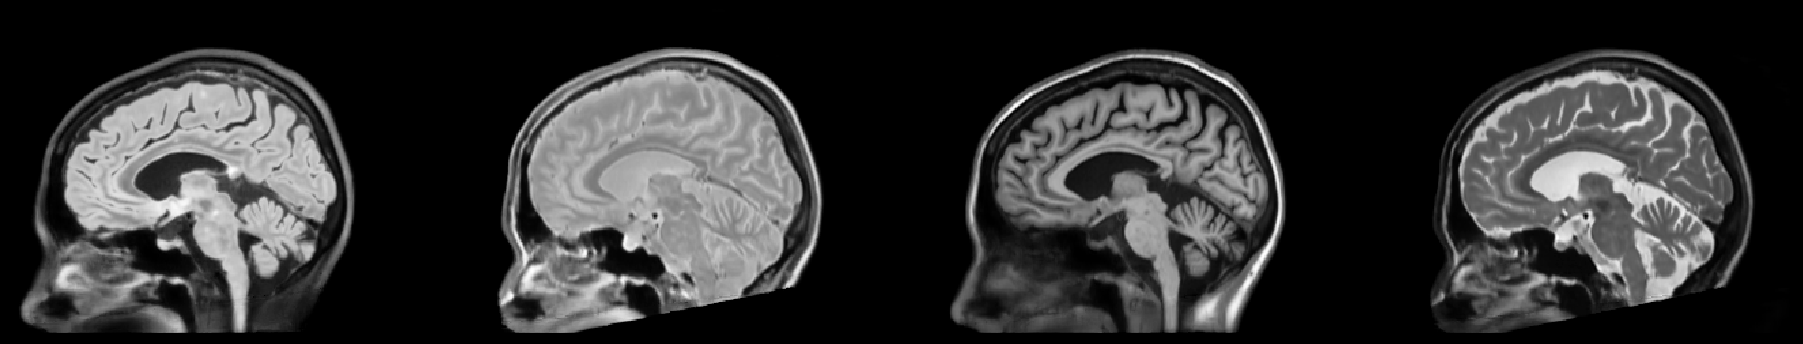

/iacl/pg20/sam/data/ms_lesions_2021/preds/002_MEMPRAGEPre_seg0.nii.gz: 0.7170259356498718


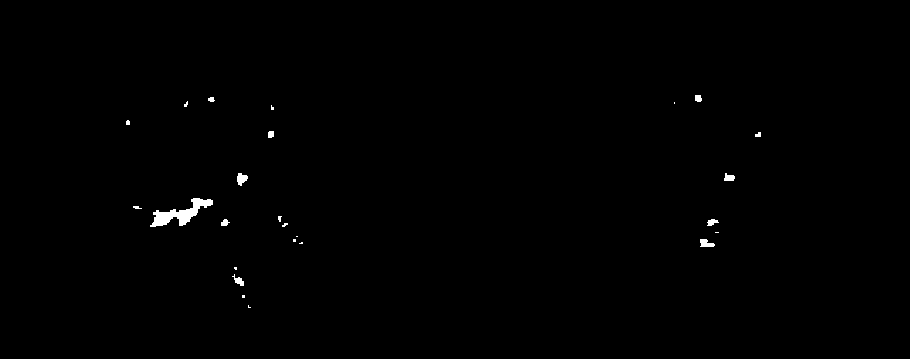

/iacl/pg20/sam/data/ms_lesions_2021/preds/002_MEMPRAGEPre_seg1.nii.gz: 0.6918017864227295


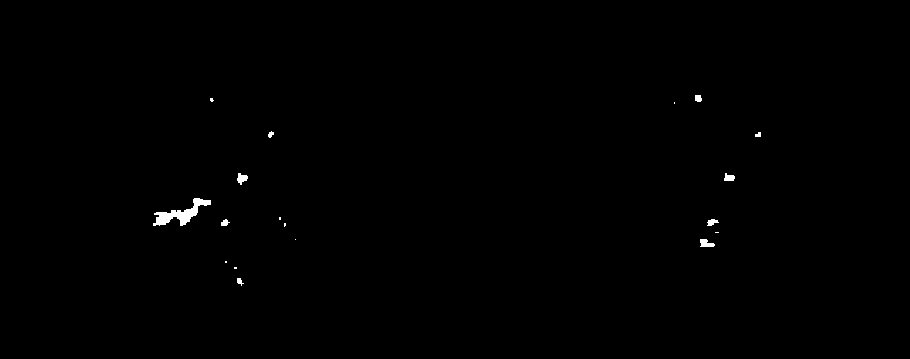

/iacl/pg20/sam/data/ms_lesions_2021/preds/002_MEMPRAGEPre_seg2.nii.gz: 0.7317790389060974


/iacl/pg20/sam/data/ms_lesions_2021/preds/002_MEMPRAGEPre_seg3.nii.gz: 0.7010854482650757


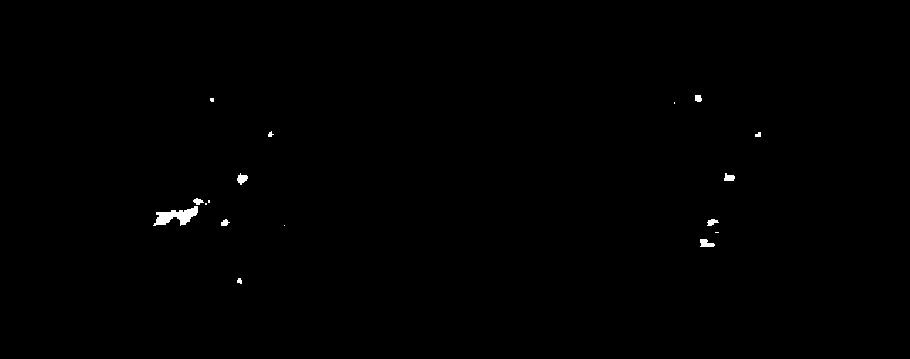

/iacl/pg20/sam/data/ms_lesions_2021/preds/002_MEMPRAGEPre_seg4.nii.gz: 0.7297044992446899


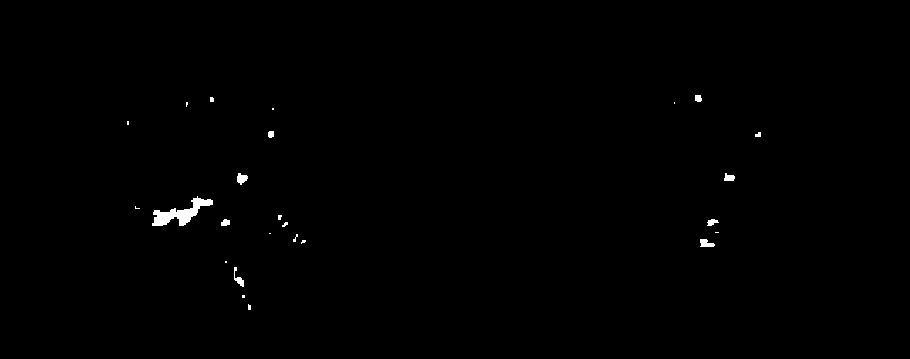

/iacl/pg20/sam/data/ms_lesions_2021/preds/002_MEMPRAGEPre_seg5.nii.gz: 0.7038718461990356


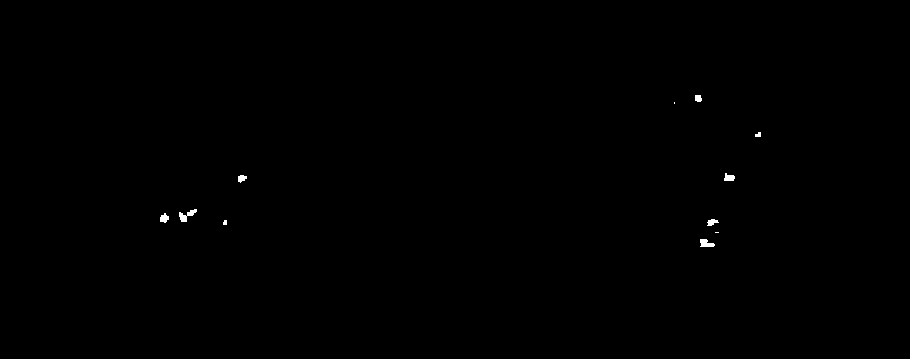

/iacl/pg20/sam/data/ms_lesions_2021/preds/002_MEMPRAGEPre_seg6.nii.gz: 0.6832895278930664


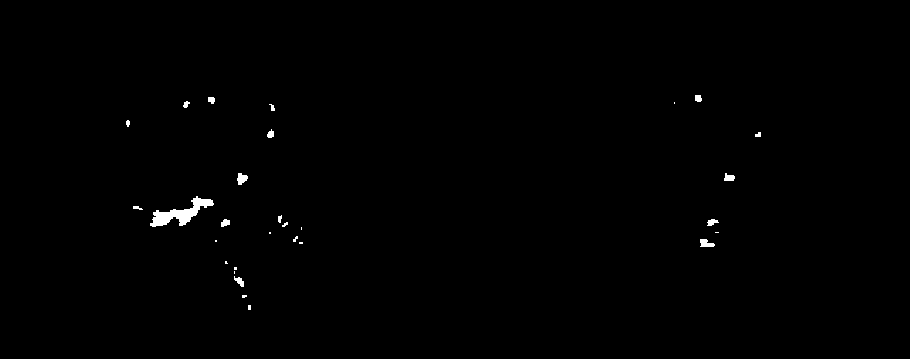

/iacl/pg20/sam/data/ms_lesions_2021/preds/002_MEMPRAGEPre_seg7.nii.gz: 0.6743760108947754


/iacl/pg20/sam/data/ms_lesions_2021/preds/002_MEMPRAGEPre_seg8.nii.gz: 0.7220052480697632


/iacl/pg20/sam/data/ms_lesions_2021/preds/002_MEMPRAGEPre_seg9.nii.gz: 0.7535107135772705


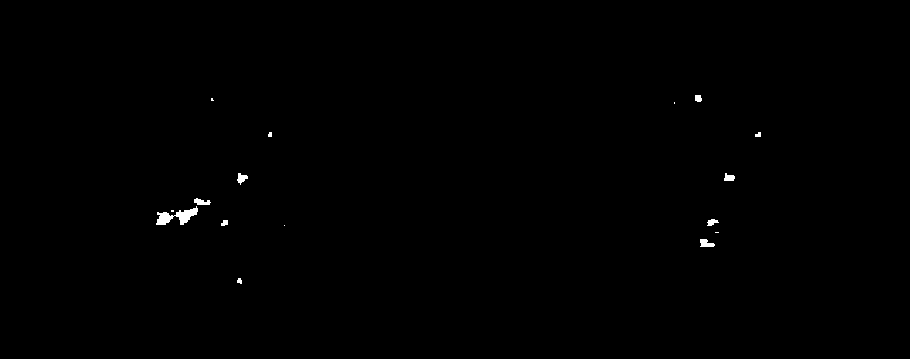

/iacl/pg20/sam/data/ms_lesions_2021/preds/002_MEMPRAGEPre_seg_final.nii.gz: 0.7535107135772705
==================== /iacl/pg20/sam/data/ms_lesions_2021/validation/003_mask.nii ====================


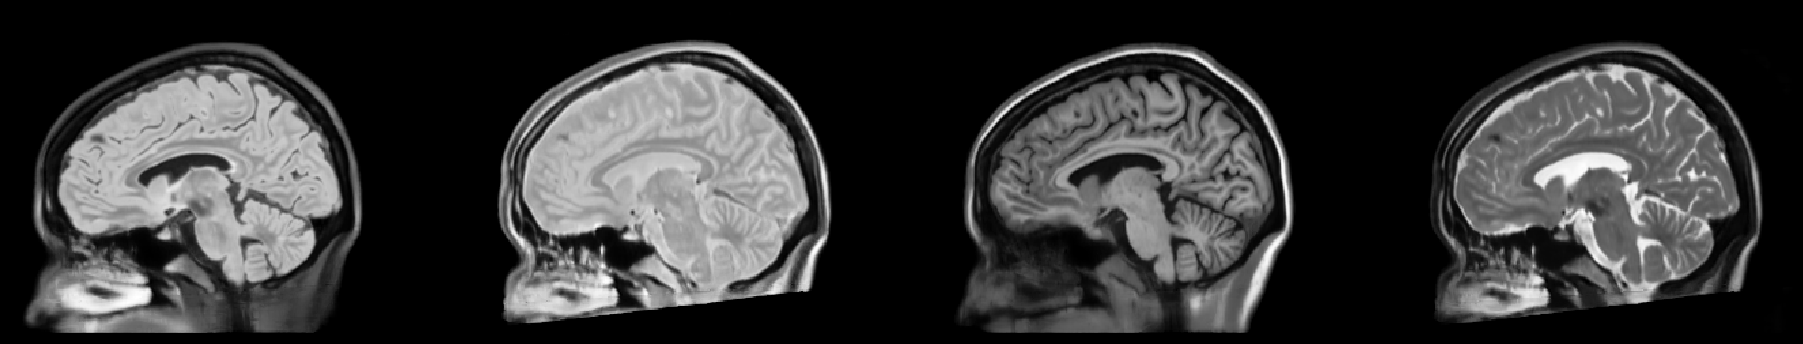

/iacl/pg20/sam/data/ms_lesions_2021/preds/003_MEMPRAGEPre_seg0.nii.gz: 0.5674318075180054


/iacl/pg20/sam/data/ms_lesions_2021/preds/003_MEMPRAGEPre_seg1.nii.gz: 0.6065183281898499


/iacl/pg20/sam/data/ms_lesions_2021/preds/003_MEMPRAGEPre_seg2.nii.gz: 0.566749095916748


/iacl/pg20/sam/data/ms_lesions_2021/preds/003_MEMPRAGEPre_seg3.nii.gz: 0.5825675129890442


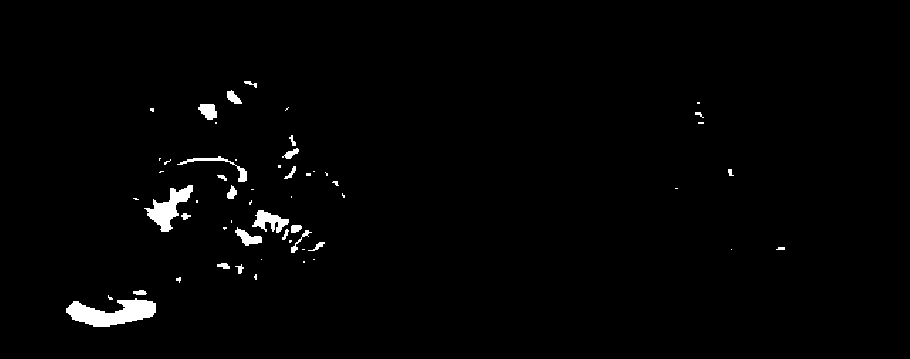

/iacl/pg20/sam/data/ms_lesions_2021/preds/003_MEMPRAGEPre_seg4.nii.gz: 0.5588353872299194


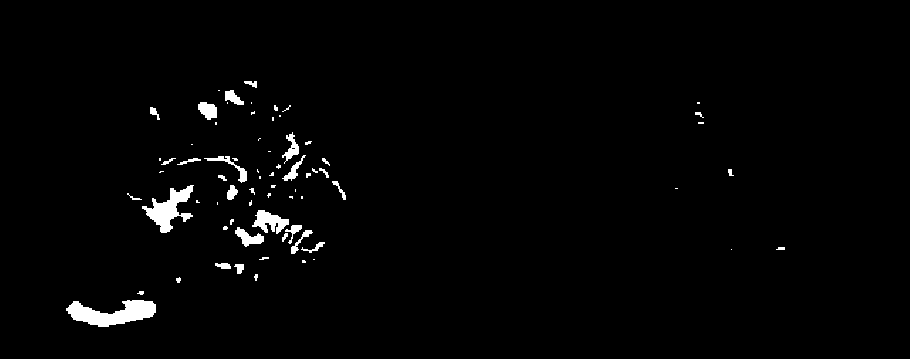

/iacl/pg20/sam/data/ms_lesions_2021/preds/003_MEMPRAGEPre_seg5.nii.gz: 0.5272848606109619


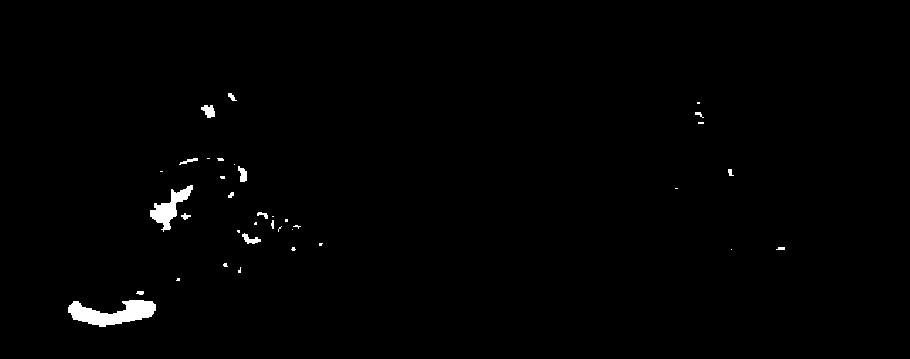

/iacl/pg20/sam/data/ms_lesions_2021/preds/003_MEMPRAGEPre_seg6.nii.gz: 0.6386869549751282


/iacl/pg20/sam/data/ms_lesions_2021/preds/003_MEMPRAGEPre_seg7.nii.gz: 0.5736979842185974


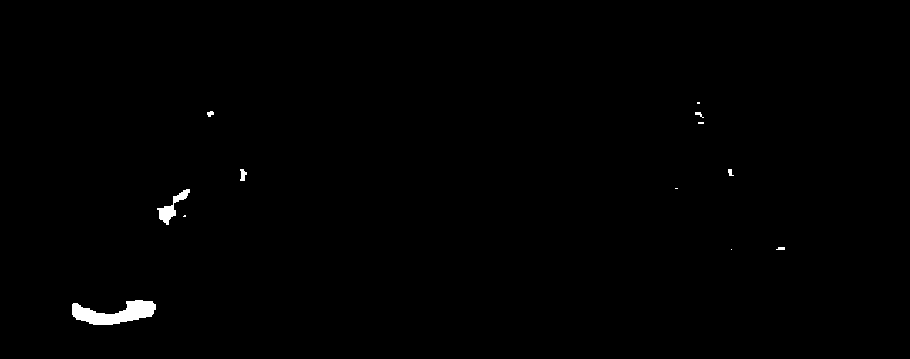

/iacl/pg20/sam/data/ms_lesions_2021/preds/003_MEMPRAGEPre_seg8.nii.gz: 0.7084183692932129


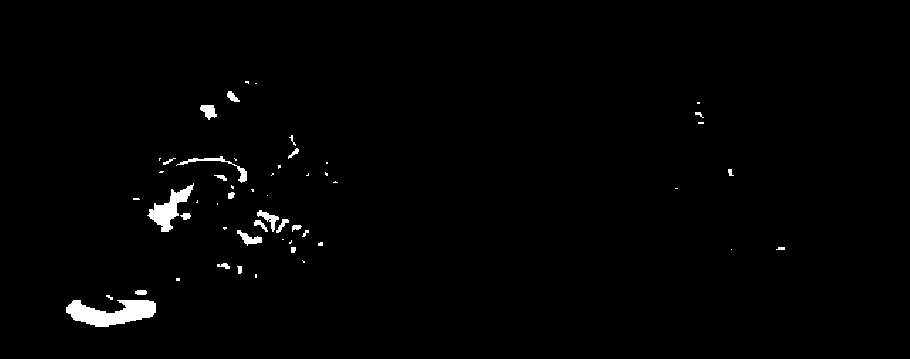

/iacl/pg20/sam/data/ms_lesions_2021/preds/003_MEMPRAGEPre_seg9.nii.gz: 0.598567008972168


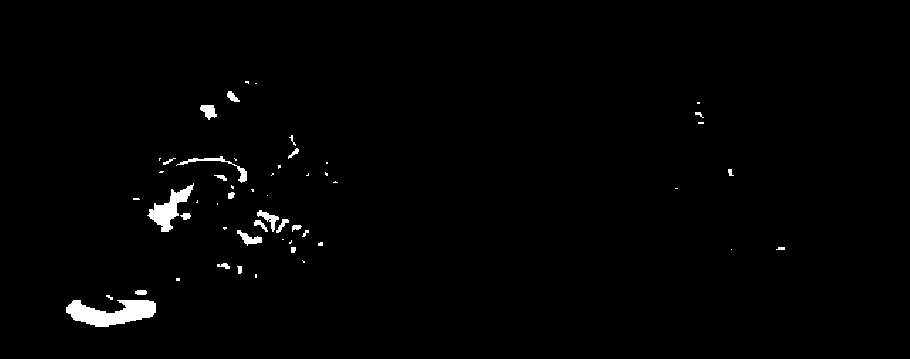

/iacl/pg20/sam/data/ms_lesions_2021/preds/003_MEMPRAGEPre_seg_final.nii.gz: 0.598567008972168
==================== /iacl/pg20/sam/data/ms_lesions_2021/validation/007_mask.nii ====================


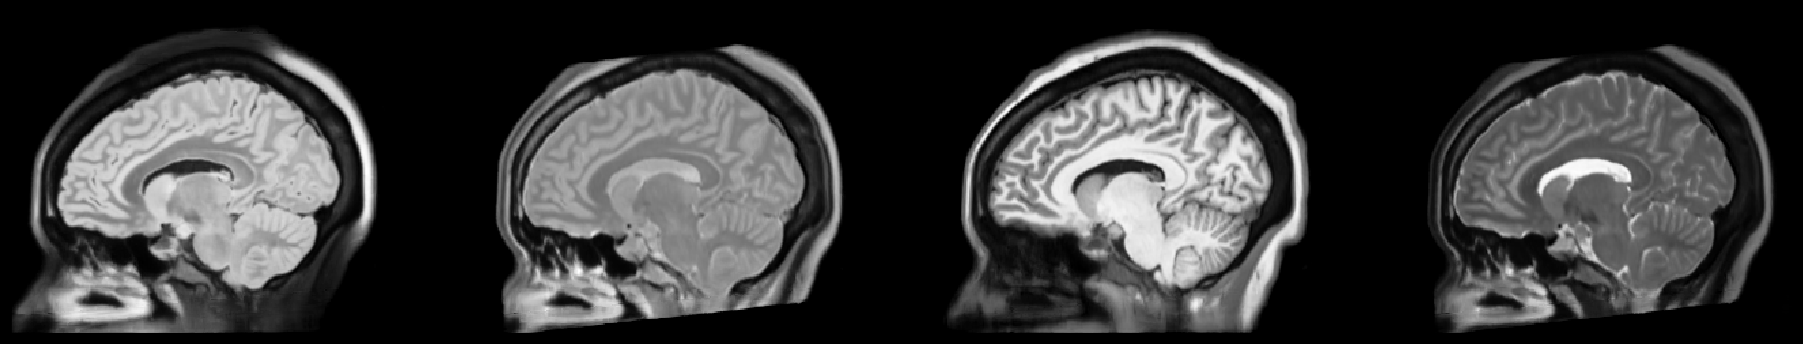

/iacl/pg20/sam/data/ms_lesions_2021/preds/007_MEMPRAGEPre_seg0.nii.gz: 0.3846502900123596


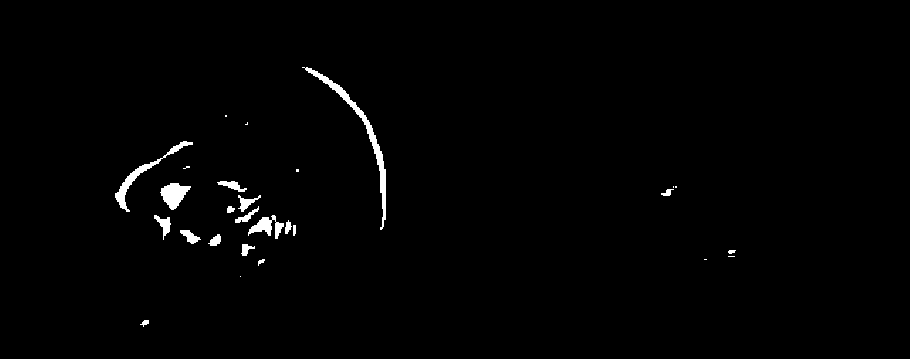

/iacl/pg20/sam/data/ms_lesions_2021/preds/007_MEMPRAGEPre_seg1.nii.gz: 0.41862183809280396


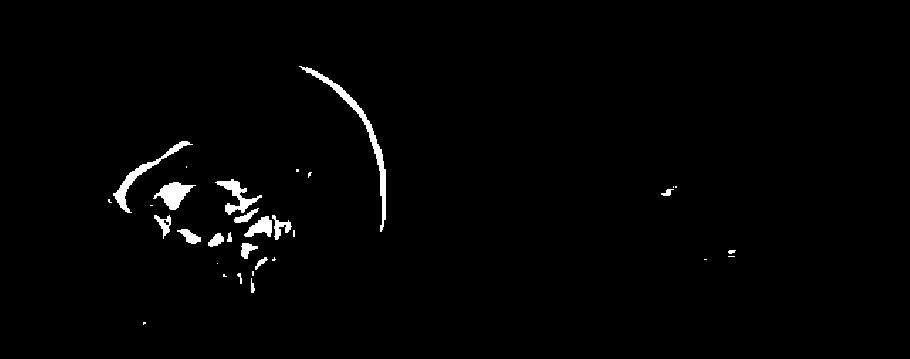

/iacl/pg20/sam/data/ms_lesions_2021/preds/007_MEMPRAGEPre_seg2.nii.gz: 0.4291152358055115


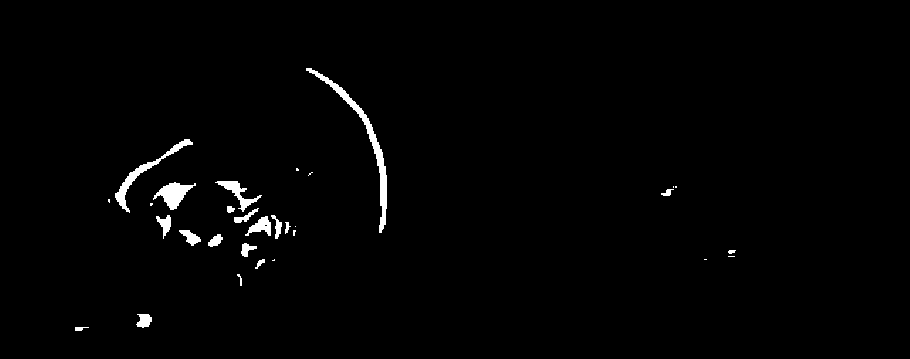

/iacl/pg20/sam/data/ms_lesions_2021/preds/007_MEMPRAGEPre_seg3.nii.gz: 0.38354814052581787


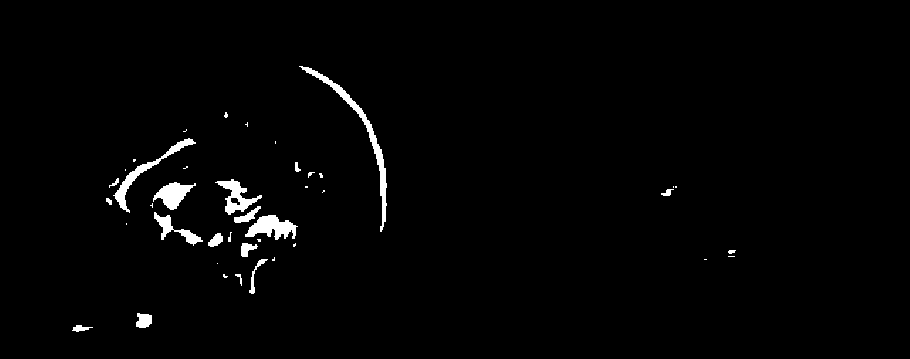

/iacl/pg20/sam/data/ms_lesions_2021/preds/007_MEMPRAGEPre_seg4.nii.gz: 0.417105495929718


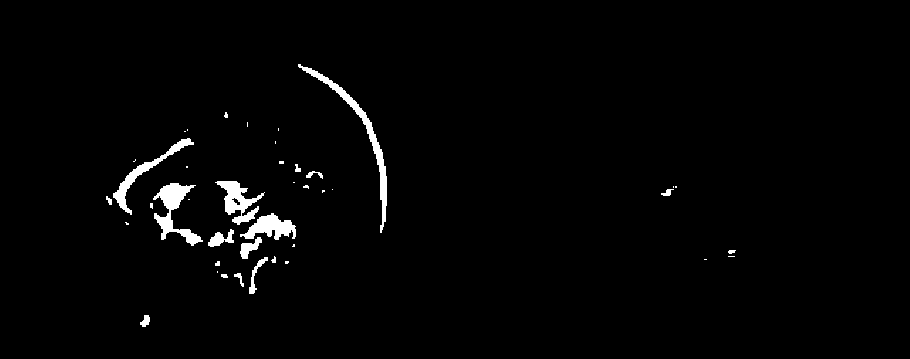

/iacl/pg20/sam/data/ms_lesions_2021/preds/007_MEMPRAGEPre_seg5.nii.gz: 0.3800472617149353


/iacl/pg20/sam/data/ms_lesions_2021/preds/007_MEMPRAGEPre_seg6.nii.gz: 0.42855626344680786


/iacl/pg20/sam/data/ms_lesions_2021/preds/007_MEMPRAGEPre_seg7.nii.gz: 0.436819851398468


/iacl/pg20/sam/data/ms_lesions_2021/preds/007_MEMPRAGEPre_seg8.nii.gz: 0.5511113405227661


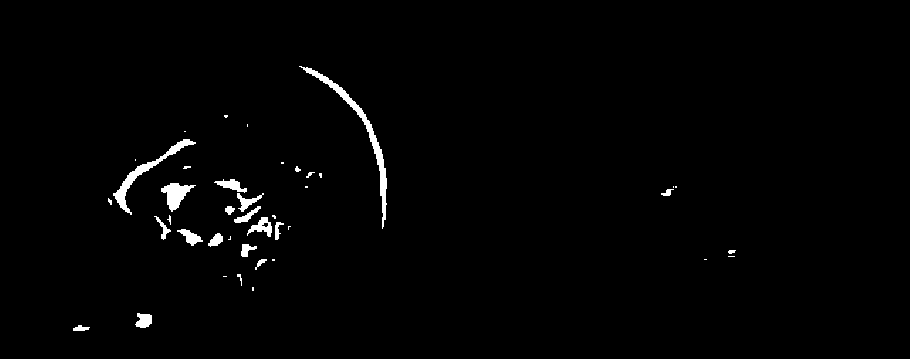

/iacl/pg20/sam/data/ms_lesions_2021/preds/007_MEMPRAGEPre_seg9.nii.gz: 0.4257940649986267


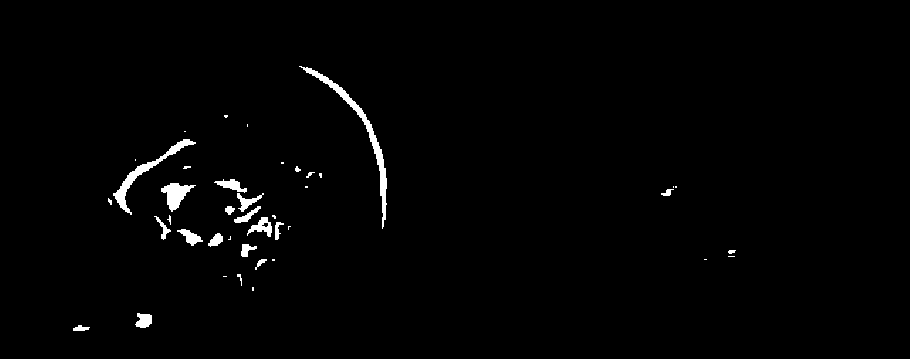

/iacl/pg20/sam/data/ms_lesions_2021/preds/007_MEMPRAGEPre_seg_final.nii.gz: 0.4257940649986267
==================== /iacl/pg20/sam/data/ms_lesions_2021/validation/008_mask.nii ====================


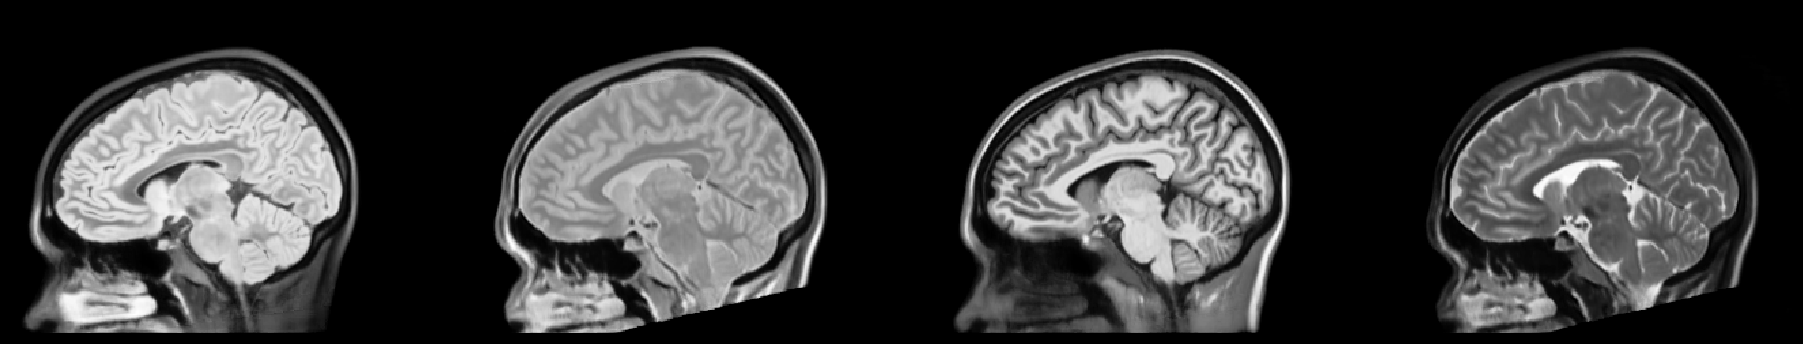

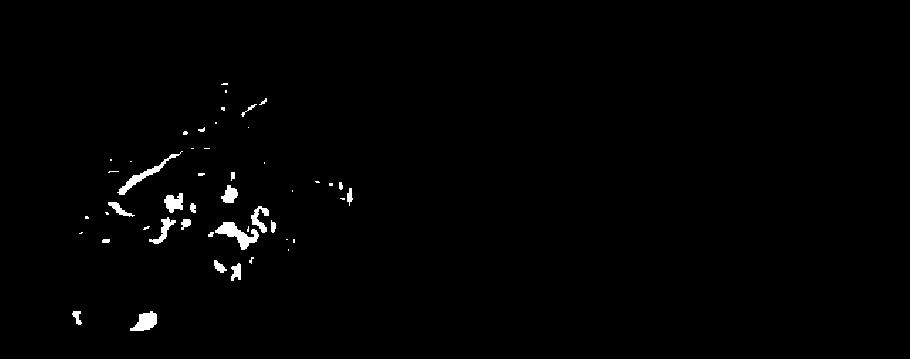

/iacl/pg20/sam/data/ms_lesions_2021/preds/008_MEMPRAGEPre_seg0.nii.gz: 0.3604971766471863


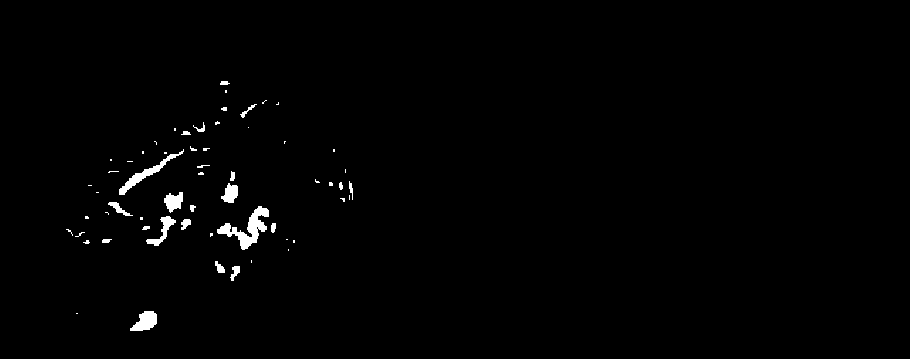

/iacl/pg20/sam/data/ms_lesions_2021/preds/008_MEMPRAGEPre_seg1.nii.gz: 0.36311042308807373


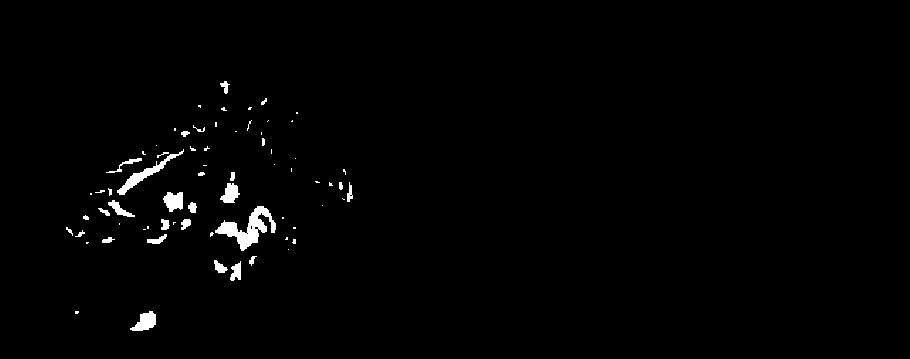

/iacl/pg20/sam/data/ms_lesions_2021/preds/008_MEMPRAGEPre_seg2.nii.gz: 0.3660352826118469


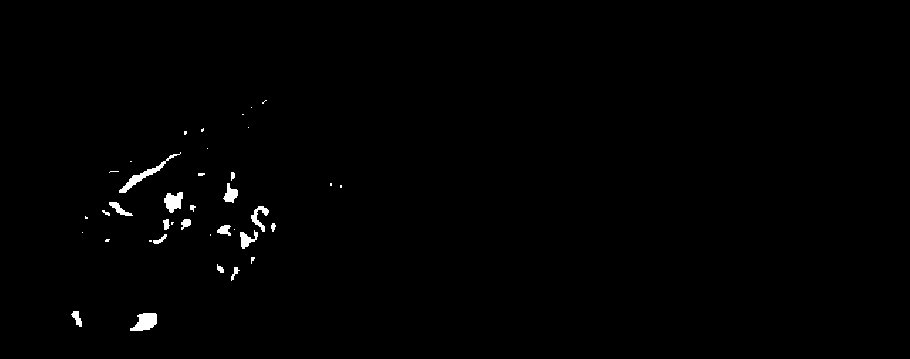

/iacl/pg20/sam/data/ms_lesions_2021/preds/008_MEMPRAGEPre_seg3.nii.gz: 0.3676551580429077


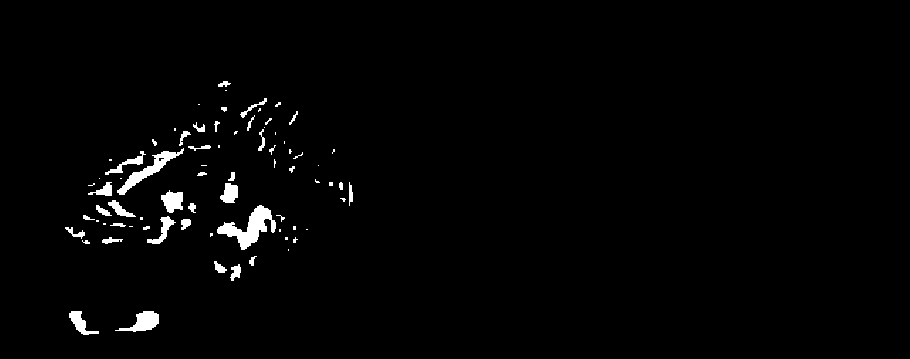

/iacl/pg20/sam/data/ms_lesions_2021/preds/008_MEMPRAGEPre_seg4.nii.gz: 0.3577159643173218


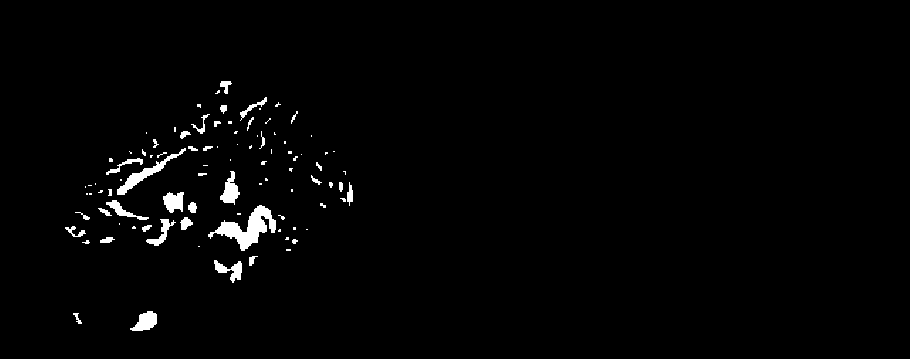

/iacl/pg20/sam/data/ms_lesions_2021/preds/008_MEMPRAGEPre_seg5.nii.gz: 0.3594822883605957


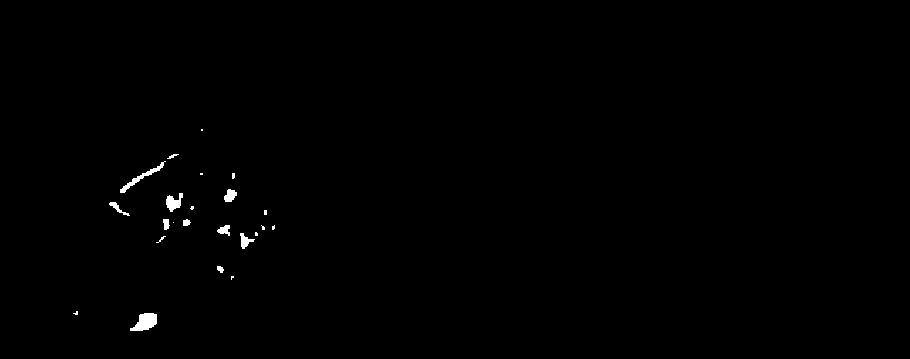

/iacl/pg20/sam/data/ms_lesions_2021/preds/008_MEMPRAGEPre_seg6.nii.gz: 0.37850093841552734


/iacl/pg20/sam/data/ms_lesions_2021/preds/008_MEMPRAGEPre_seg7.nii.gz: 0.3654475212097168


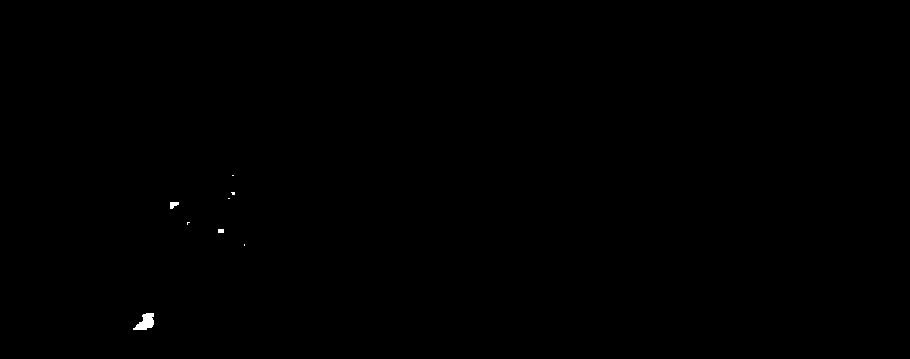

/iacl/pg20/sam/data/ms_lesions_2021/preds/008_MEMPRAGEPre_seg8.nii.gz: 0.4358348250389099


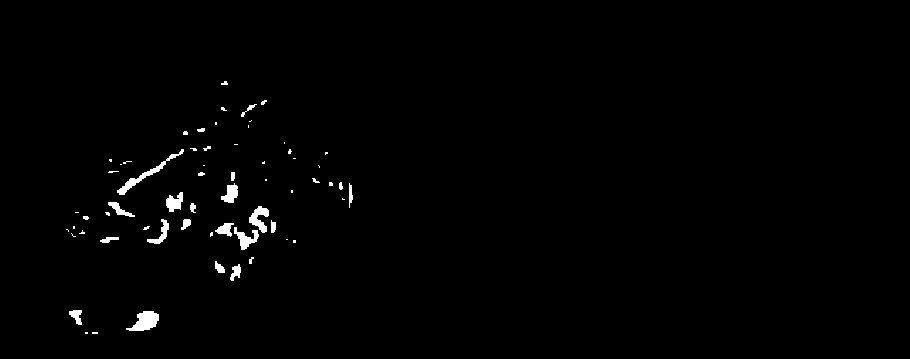

/iacl/pg20/sam/data/ms_lesions_2021/preds/008_MEMPRAGEPre_seg9.nii.gz: 0.35935258865356445


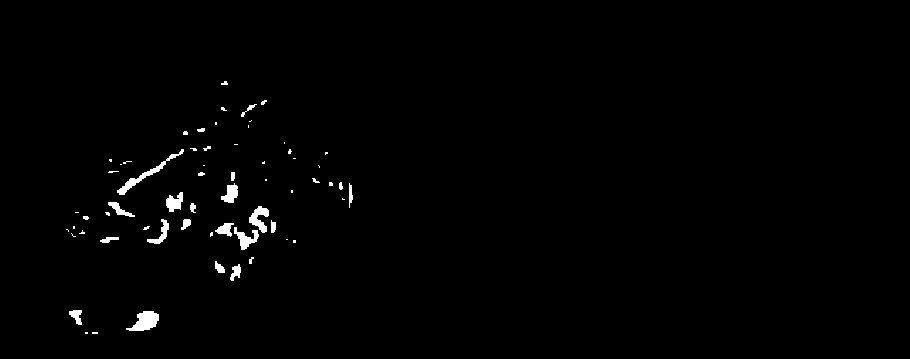

/iacl/pg20/sam/data/ms_lesions_2021/preds/008_MEMPRAGEPre_seg_final.nii.gz: 0.35935258865356445
==================== /iacl/pg20/sam/data/ms_lesions_2021/validation/009_mask.nii ====================


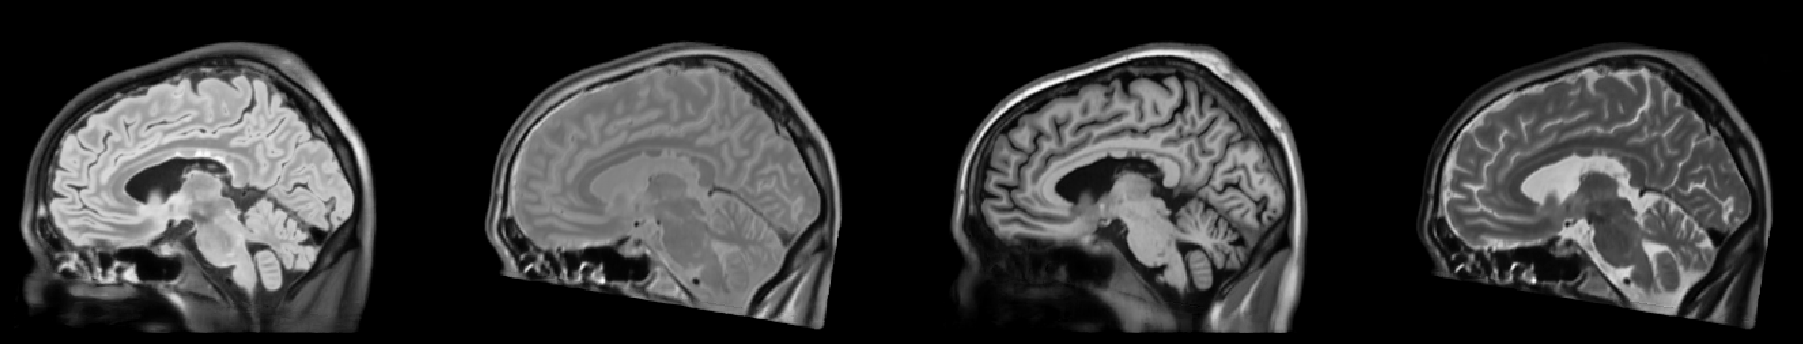

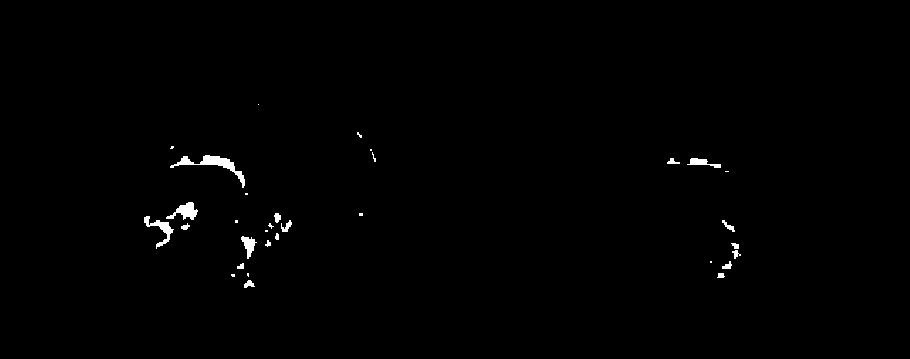

/iacl/pg20/sam/data/ms_lesions_2021/preds/009_MEMPRAGEPre_seg0.nii.gz: 0.7257709503173828


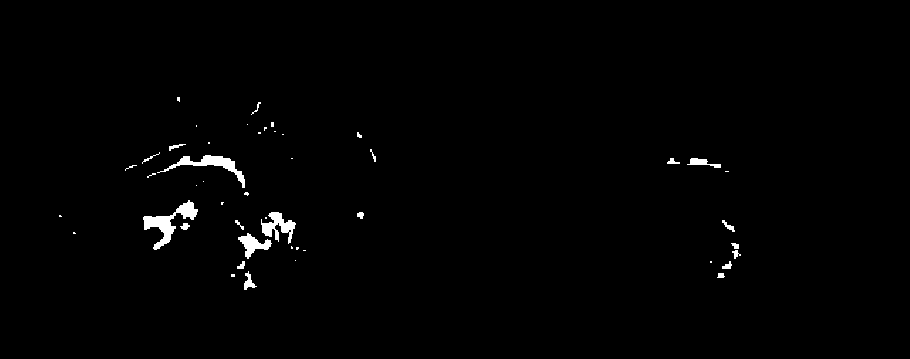

/iacl/pg20/sam/data/ms_lesions_2021/preds/009_MEMPRAGEPre_seg1.nii.gz: 0.5568908452987671


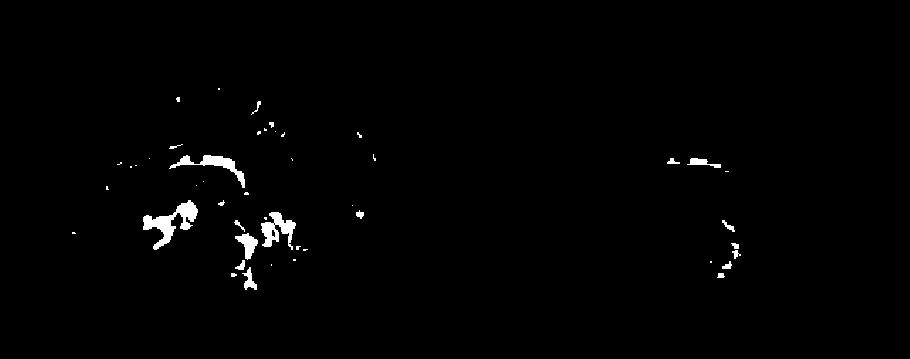

/iacl/pg20/sam/data/ms_lesions_2021/preds/009_MEMPRAGEPre_seg2.nii.gz: 0.5535458326339722


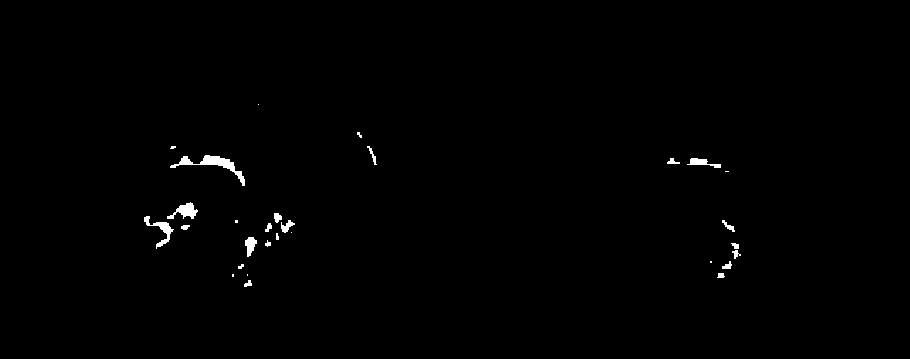

/iacl/pg20/sam/data/ms_lesions_2021/preds/009_MEMPRAGEPre_seg3.nii.gz: 0.7467734813690186


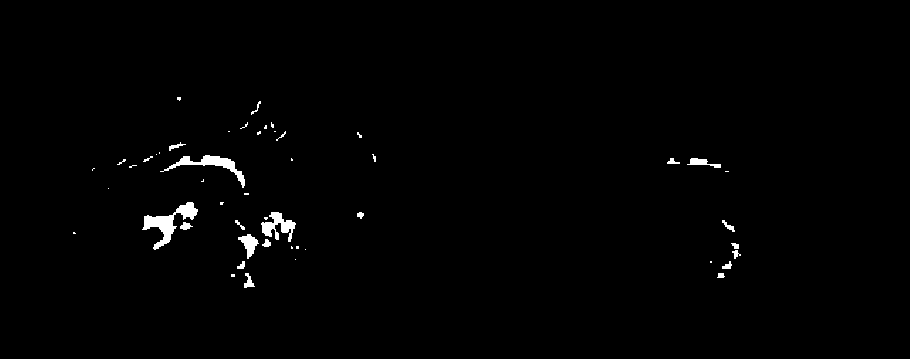

/iacl/pg20/sam/data/ms_lesions_2021/preds/009_MEMPRAGEPre_seg4.nii.gz: 0.5998139381408691


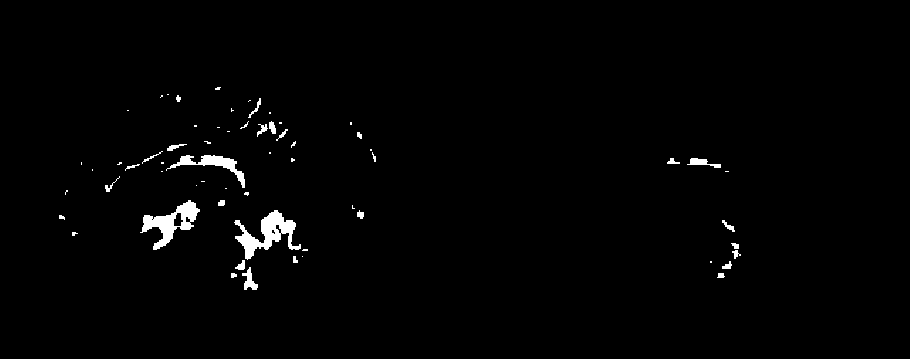

/iacl/pg20/sam/data/ms_lesions_2021/preds/009_MEMPRAGEPre_seg5.nii.gz: 0.5029988884925842


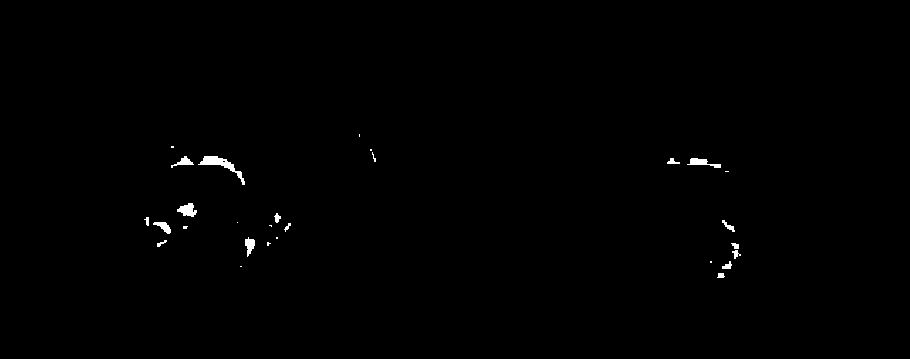

/iacl/pg20/sam/data/ms_lesions_2021/preds/009_MEMPRAGEPre_seg6.nii.gz: 0.7798094153404236


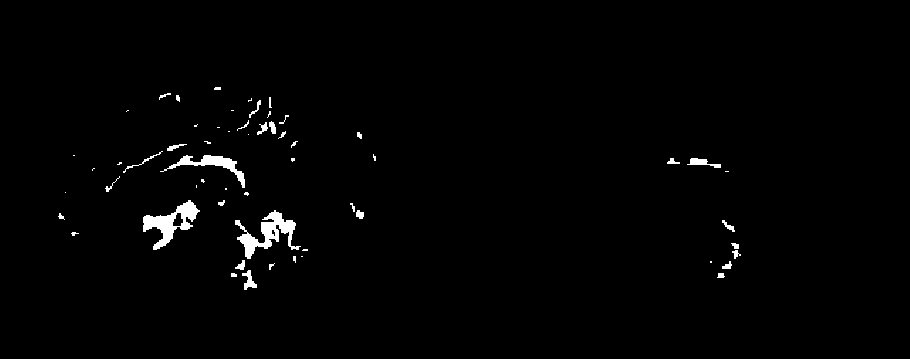

/iacl/pg20/sam/data/ms_lesions_2021/preds/009_MEMPRAGEPre_seg7.nii.gz: 0.5088455677032471


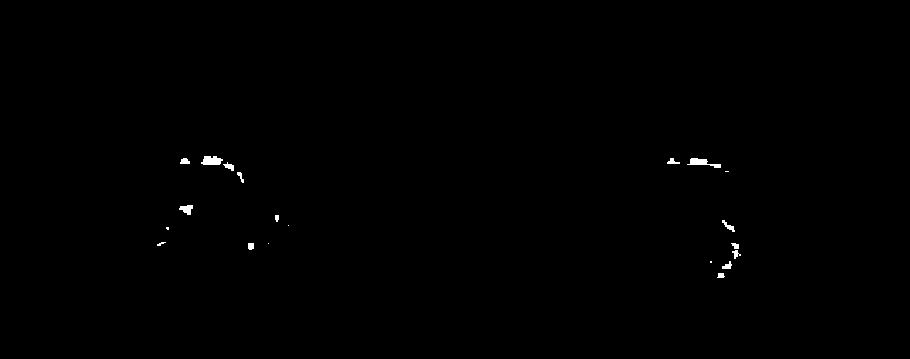

/iacl/pg20/sam/data/ms_lesions_2021/preds/009_MEMPRAGEPre_seg8.nii.gz: 0.8160668015480042


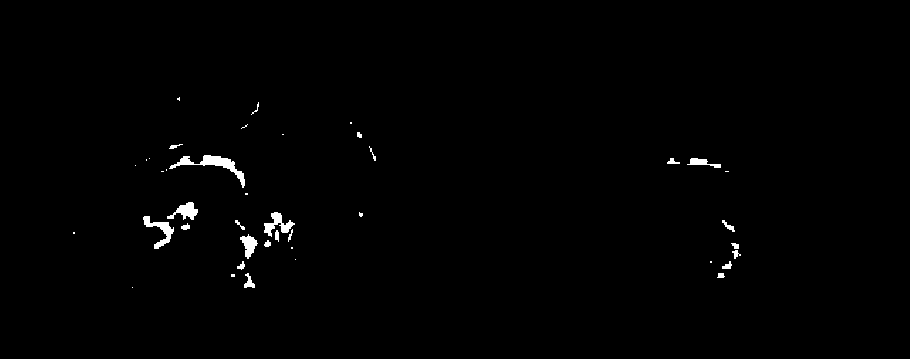

/iacl/pg20/sam/data/ms_lesions_2021/preds/009_MEMPRAGEPre_seg9.nii.gz: 0.632046639919281


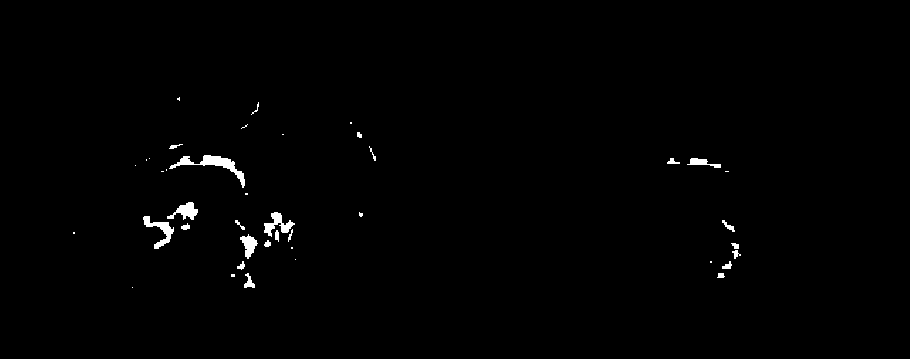

/iacl/pg20/sam/data/ms_lesions_2021/preds/009_MEMPRAGEPre_seg_final.nii.gz: 0.632046639919281
==================== /iacl/pg20/sam/data/ms_lesions_2021/validation/010_mask.nii ====================


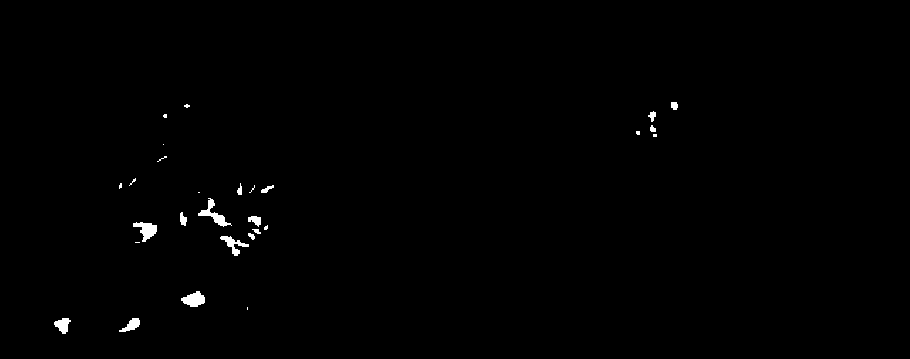

/iacl/pg20/sam/data/ms_lesions_2021/preds/010_MEMPRAGEPre_seg0.nii.gz: 0.500112771987915


/iacl/pg20/sam/data/ms_lesions_2021/preds/010_MEMPRAGEPre_seg1.nii.gz: 0.43658000230789185


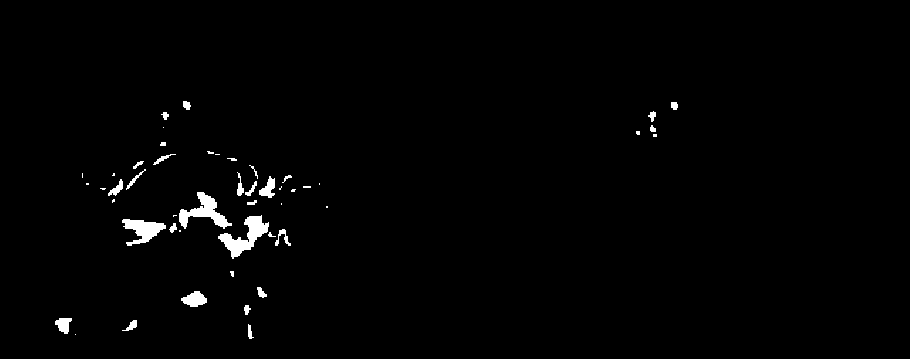

/iacl/pg20/sam/data/ms_lesions_2021/preds/010_MEMPRAGEPre_seg2.nii.gz: 0.448386549949646


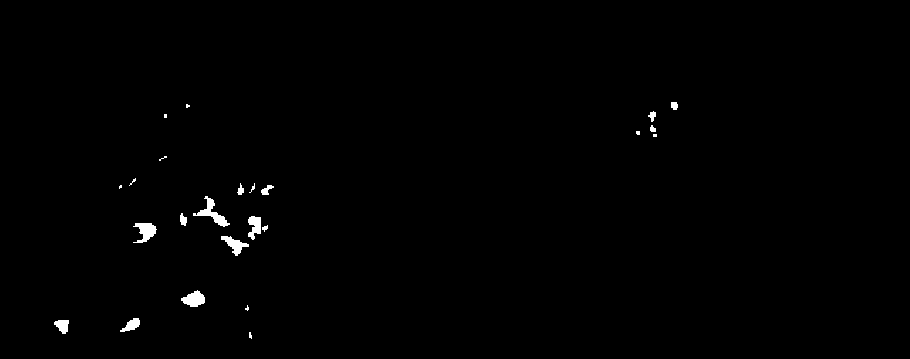

/iacl/pg20/sam/data/ms_lesions_2021/preds/010_MEMPRAGEPre_seg3.nii.gz: 0.4906182289123535


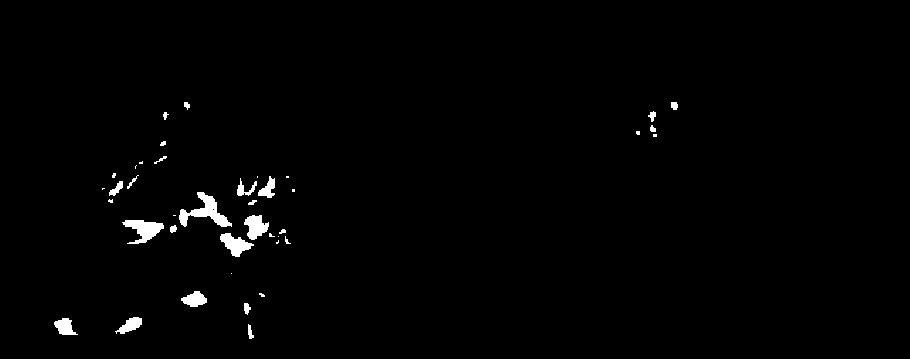

/iacl/pg20/sam/data/ms_lesions_2021/preds/010_MEMPRAGEPre_seg4.nii.gz: 0.45645081996917725


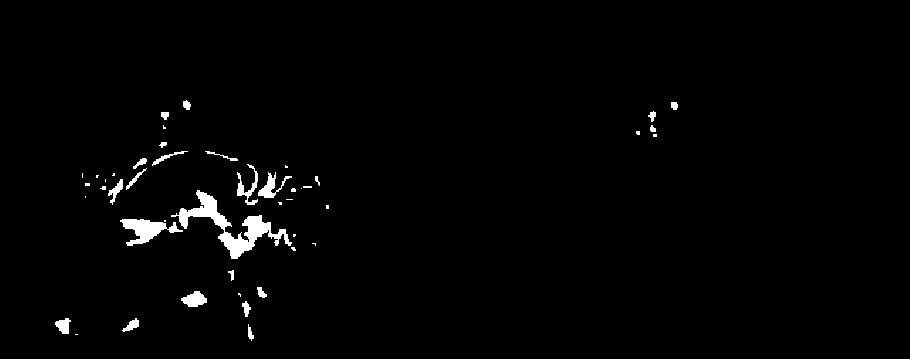

/iacl/pg20/sam/data/ms_lesions_2021/preds/010_MEMPRAGEPre_seg5.nii.gz: 0.4345560073852539


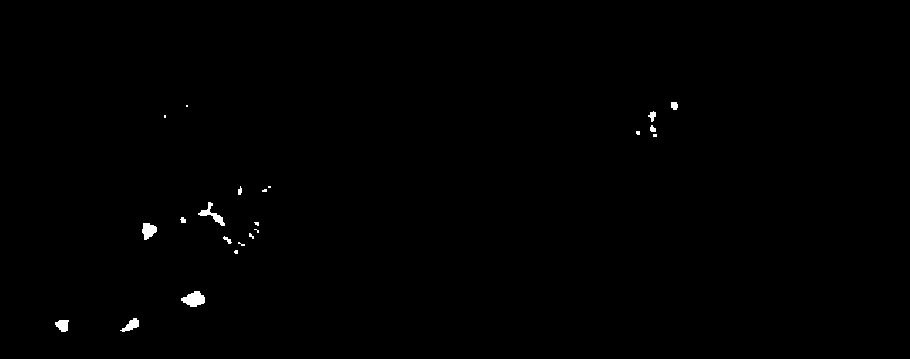

/iacl/pg20/sam/data/ms_lesions_2021/preds/010_MEMPRAGEPre_seg6.nii.gz: 0.5799646377563477


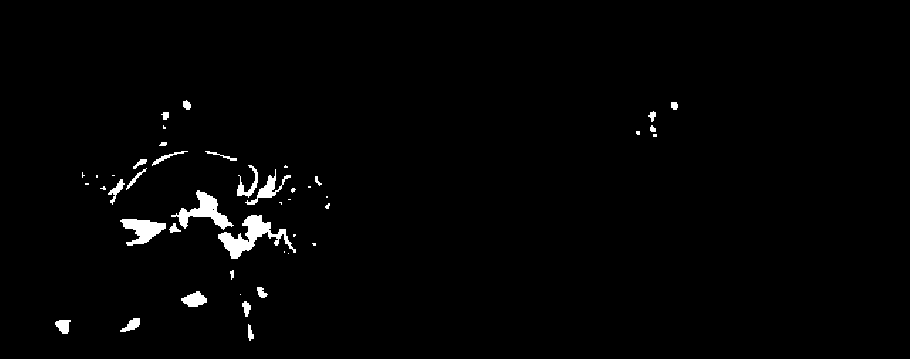

/iacl/pg20/sam/data/ms_lesions_2021/preds/010_MEMPRAGEPre_seg7.nii.gz: 0.43141525983810425


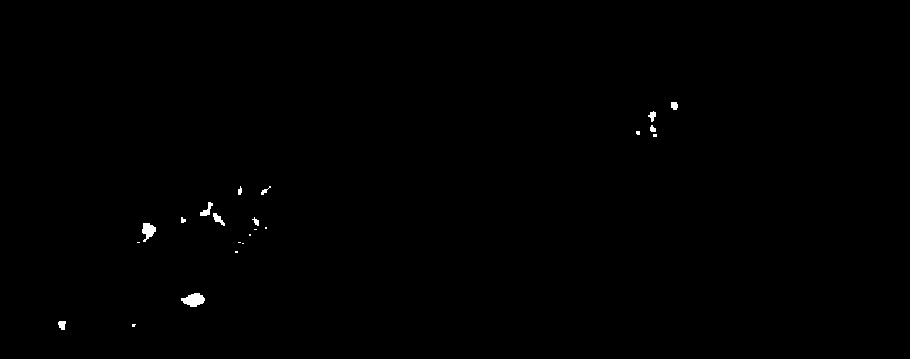

/iacl/pg20/sam/data/ms_lesions_2021/preds/010_MEMPRAGEPre_seg8.nii.gz: 0.6084727048873901


/iacl/pg20/sam/data/ms_lesions_2021/preds/010_MEMPRAGEPre_seg9.nii.gz: 0.4725903868675232


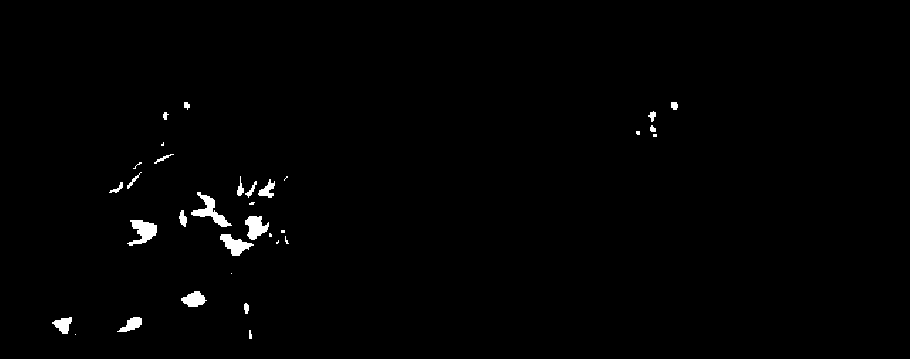

/iacl/pg20/sam/data/ms_lesions_2021/preds/010_MEMPRAGEPre_seg_final.nii.gz: 0.4725903868675232
==================== /iacl/pg20/sam/data/ms_lesions_2021/validation/011_mask.nii ====================


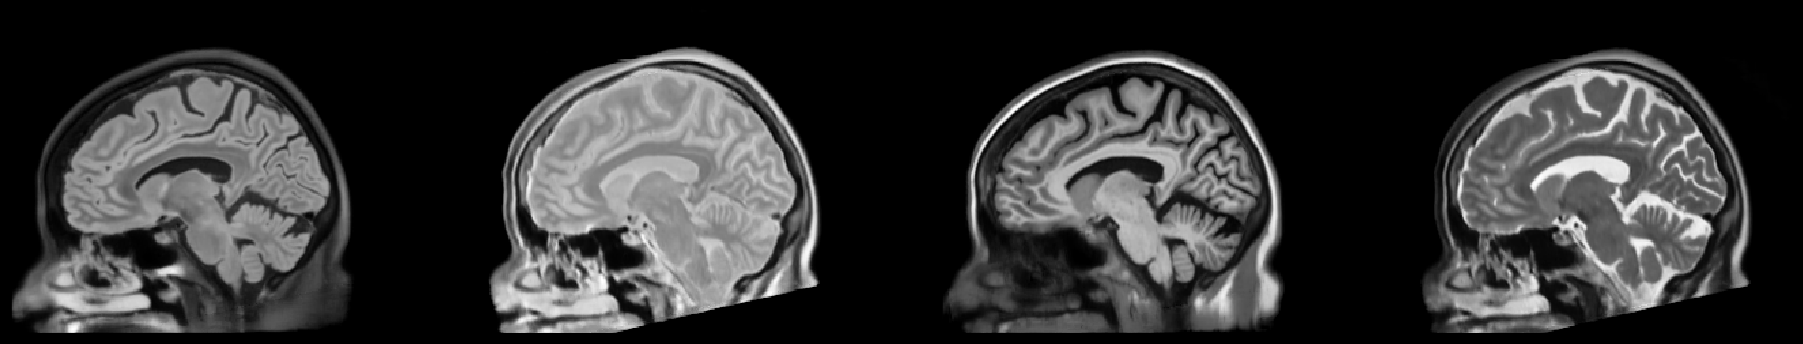

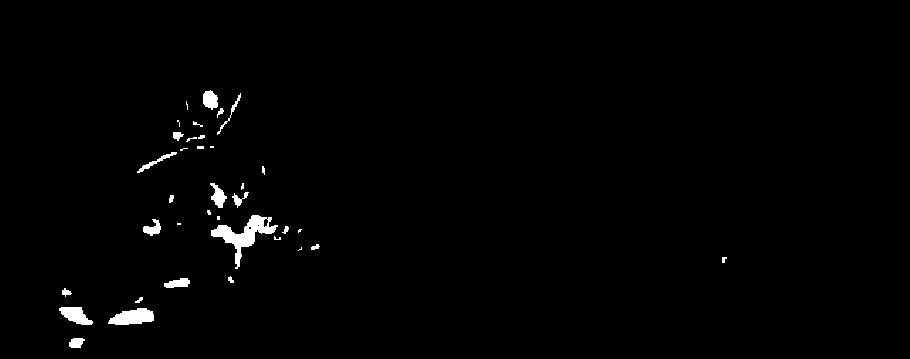

/iacl/pg20/sam/data/ms_lesions_2021/preds/011_MEMPRAGEPre_seg0.nii.gz: 0.42787855863571167


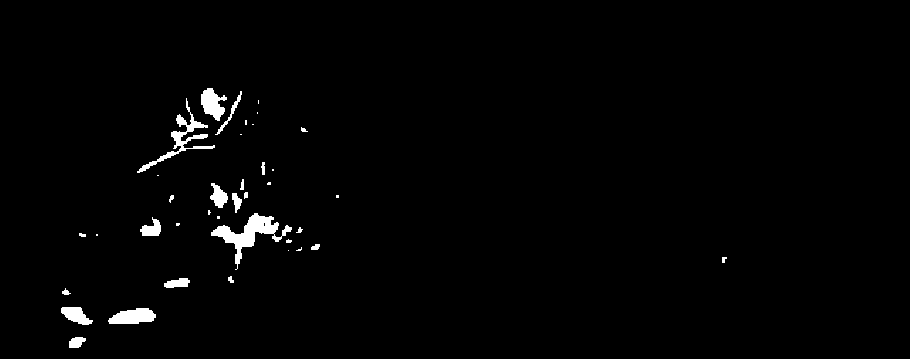

/iacl/pg20/sam/data/ms_lesions_2021/preds/011_MEMPRAGEPre_seg1.nii.gz: 0.40864425897598267


/iacl/pg20/sam/data/ms_lesions_2021/preds/011_MEMPRAGEPre_seg2.nii.gz: 0.4047013521194458


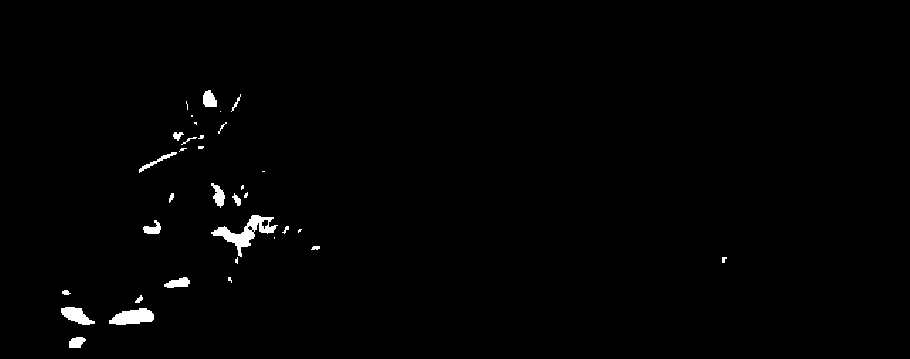

/iacl/pg20/sam/data/ms_lesions_2021/preds/011_MEMPRAGEPre_seg3.nii.gz: 0.4352468252182007


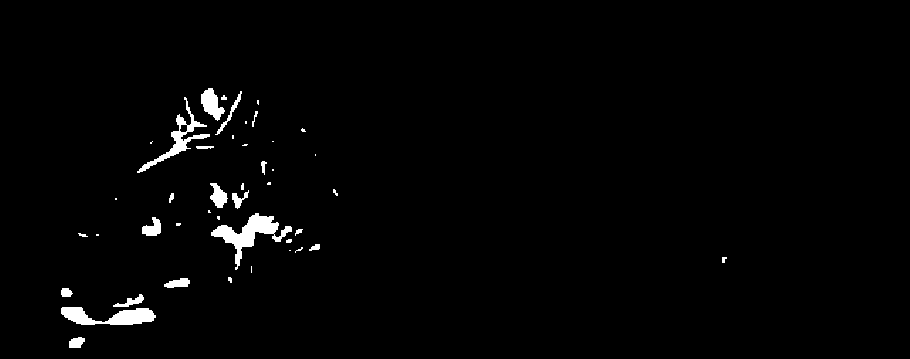

/iacl/pg20/sam/data/ms_lesions_2021/preds/011_MEMPRAGEPre_seg4.nii.gz: 0.41064882278442383


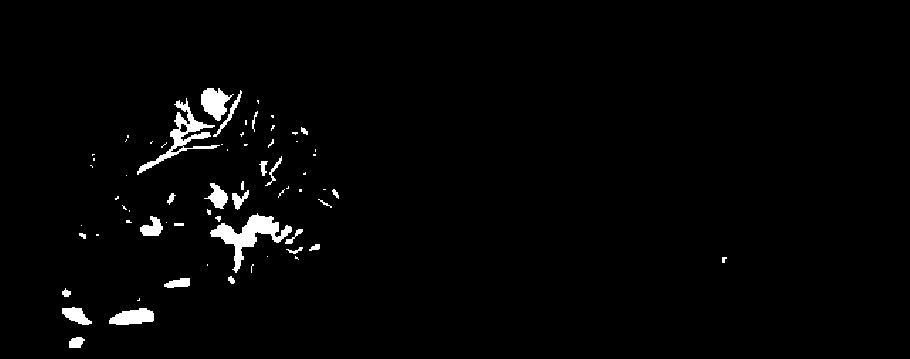

/iacl/pg20/sam/data/ms_lesions_2021/preds/011_MEMPRAGEPre_seg5.nii.gz: 0.3923352360725403


/iacl/pg20/sam/data/ms_lesions_2021/preds/011_MEMPRAGEPre_seg6.nii.gz: 0.46118026971817017


/iacl/pg20/sam/data/ms_lesions_2021/preds/011_MEMPRAGEPre_seg7.nii.gz: 0.39552628993988037


/iacl/pg20/sam/data/ms_lesions_2021/preds/011_MEMPRAGEPre_seg8.nii.gz: 0.4845206141471863


/iacl/pg20/sam/data/ms_lesions_2021/preds/011_MEMPRAGEPre_seg9.nii.gz: 0.4251125454902649


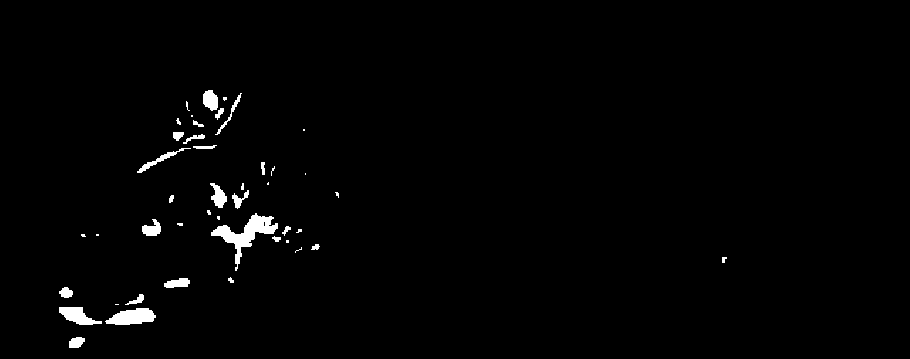

/iacl/pg20/sam/data/ms_lesions_2021/preds/011_MEMPRAGEPre_seg_final.nii.gz: 0.4251125454902649
==================== /iacl/pg20/sam/data/ms_lesions_2021/validation/012_mask.nii ====================


/iacl/pg20/sam/data/ms_lesions_2021/preds/012_MEMPRAGEPre_seg0.nii.gz: 0.5644093751907349


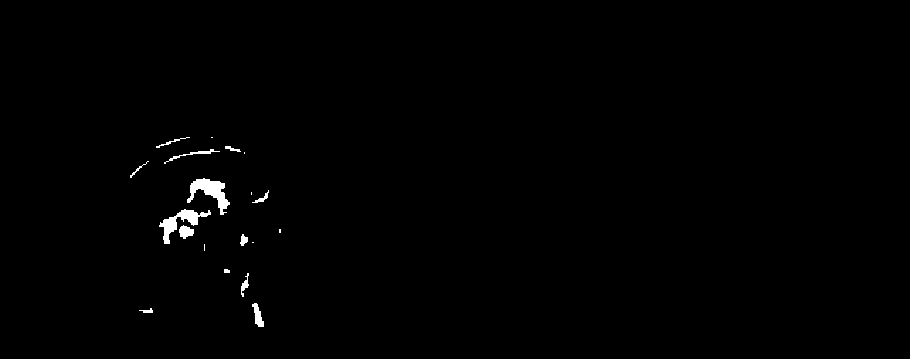

/iacl/pg20/sam/data/ms_lesions_2021/preds/012_MEMPRAGEPre_seg1.nii.gz: 0.5602167248725891


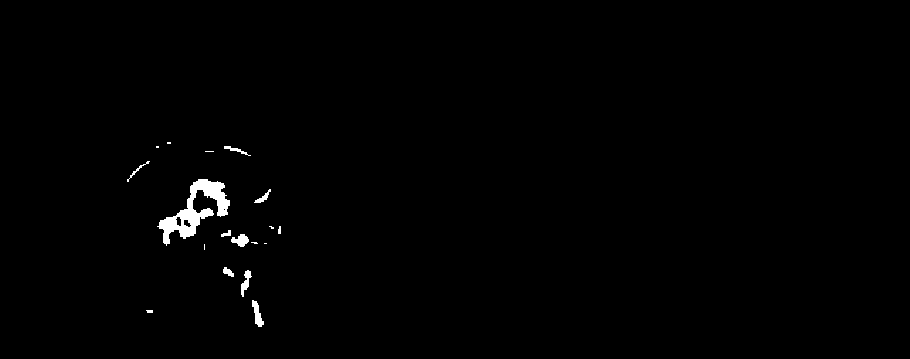

/iacl/pg20/sam/data/ms_lesions_2021/preds/012_MEMPRAGEPre_seg2.nii.gz: 0.5568723678588867


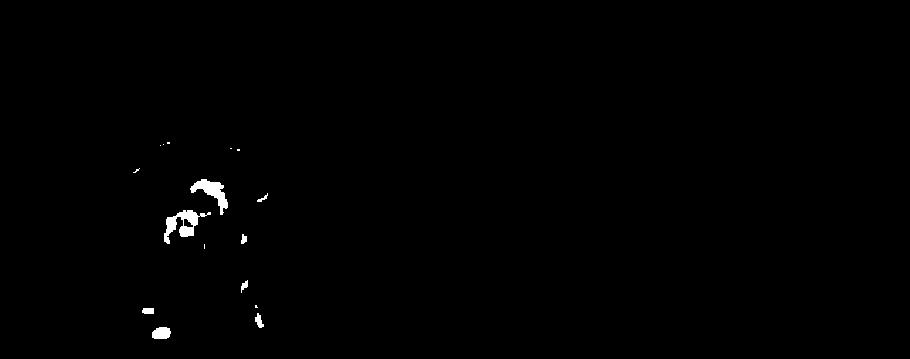

/iacl/pg20/sam/data/ms_lesions_2021/preds/012_MEMPRAGEPre_seg3.nii.gz: 0.5807406902313232


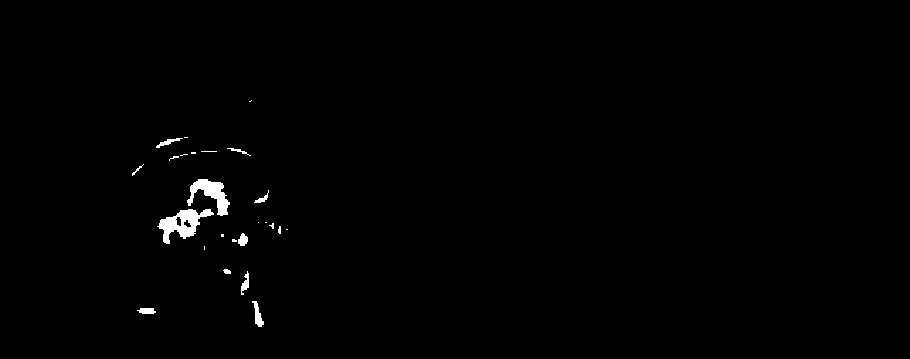

/iacl/pg20/sam/data/ms_lesions_2021/preds/012_MEMPRAGEPre_seg4.nii.gz: 0.5437248945236206


/iacl/pg20/sam/data/ms_lesions_2021/preds/012_MEMPRAGEPre_seg5.nii.gz: 0.5118536949157715


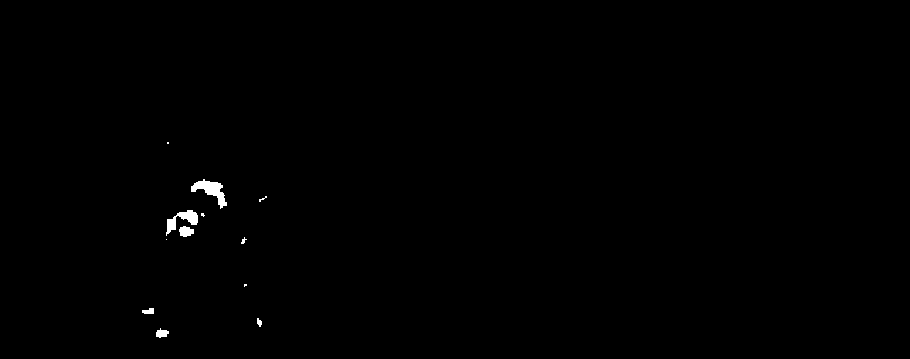

/iacl/pg20/sam/data/ms_lesions_2021/preds/012_MEMPRAGEPre_seg6.nii.gz: 0.5985515117645264


/iacl/pg20/sam/data/ms_lesions_2021/preds/012_MEMPRAGEPre_seg7.nii.gz: 0.5239278078079224


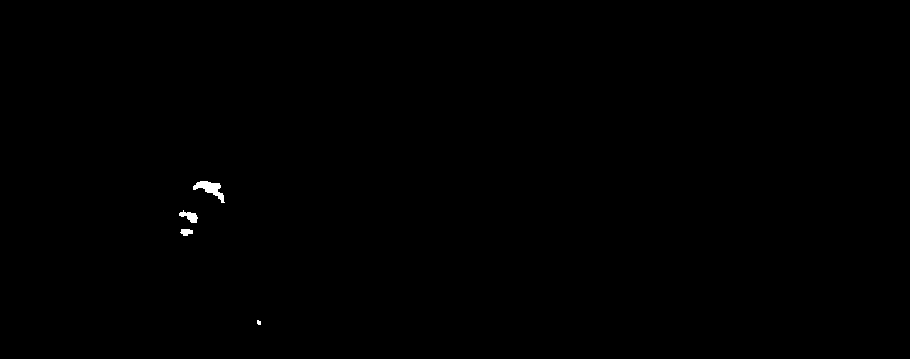

/iacl/pg20/sam/data/ms_lesions_2021/preds/012_MEMPRAGEPre_seg8.nii.gz: 0.6564799547195435


/iacl/pg20/sam/data/ms_lesions_2021/preds/012_MEMPRAGEPre_seg9.nii.gz: 0.5421832203865051


/iacl/pg20/sam/data/ms_lesions_2021/preds/012_MEMPRAGEPre_seg_final.nii.gz: 0.5421832203865051


In [12]:
i = 128
for patient_id in patient_ids:
    pred_fpaths = [x for x in fpaths if patient_id in x.name]
    true_fpaths = [x for x in truth_folder.iterdir() if patient_id in x.name and "mask" in x.name]
    
    print("="*20, true_fpaths[0], "="*20)
    
    fl_fpath = [x for x in truth_folder.iterdir() if patient_id in x.name and "FLAIR" in x.name][0]
    pd_fpath = [x for x in truth_folder.iterdir() if patient_id in x.name and "PD" in x.name][0]
    t1_fpath = [x for x in truth_folder.iterdir() if patient_id in x.name and "MPRAGE" in x.name][0]
    t2_fpath = [x for x in truth_folder.iterdir() if patient_id in x.name and "T2" in x.name][0]
    
    fl = nib.load(fl_fpath).get_fdata()
    pd = nib.load(pd_fpath).get_fdata()
    t1 = nib.load(t1_fpath).get_fdata()
    t2 = nib.load(t2_fpath).get_fdata()
    
    y_true = torch.from_numpy(nib.load(true_fpaths[0]).get_fdata(dtype=np.float32))
    
    multiplot([
        fl[i], pd[i], t1[i], t2[i],
    ])
    for fpath in pred_fpaths:
        y_pred = torch.from_numpy(nib.load(fpath).get_fdata(dtype=np.float32))
        multiplot([y_pred[i].numpy(), y_true[i].numpy()])
        
        print(f'{fpath}: {dice(y_true, y_pred)}')